<a href="https://colab.research.google.com/github/tnwjd3315/daily-commit/blob/main/MNIST_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST handwritten digit classification test followed by [링크 텍스트](https://velog.io/@tmddn0311/mnist-classification), [링크 텍스트](https://velog.io/@kingdo/MNIST-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-%EC%86%90%EA%B8%80%EC%94%A8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0)

# 1. 데이터 불러오기

In [ ]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


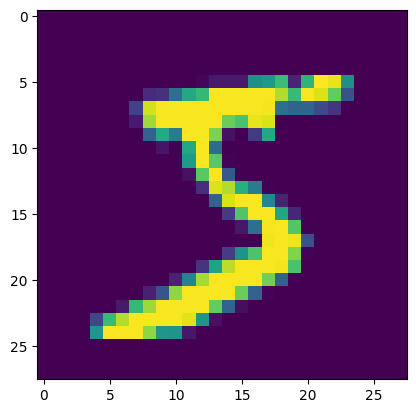

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[0])
plt.show()

# 2.데이터 전처리

In [ ]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [ ]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


# 3.모델 정의 및 컴파일

In [ ]:
model = Sequential()  # 모델 선언

In [ ]:
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

In [ ]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# 4.모델 학습 및 검증

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08774618804454803
print("정확도:", acc)  # 정확도: 0.9768999814987183

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.8628 - loss: 0.4822 - val_acc: 0.9560 - val_loss: 0.1533
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9618 - loss: 0.1288 - val_acc: 0.9673 - val_loss: 0.1115
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9753 - loss: 0.0842 - val_acc: 0.9700 - val_loss: 0.0993
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9812 - loss: 0.0624 - val_acc: 0.9724 - val_loss: 0.0916
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.9862 - loss: 0.0466 - val_acc: 0.9750 - val_loss: 0.0908
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.9893 - loss: 0.0359 - val_acc: 0.9736 - val_loss: 0.0897
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9921 - loss: 0.0266 - val_acc: 0.9723 - val_loss: 0.0968
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.9934 - loss: 0.0225 - val_acc: 0.9752 - val_loss: 0.0891
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━

# 5. 학습 시각화

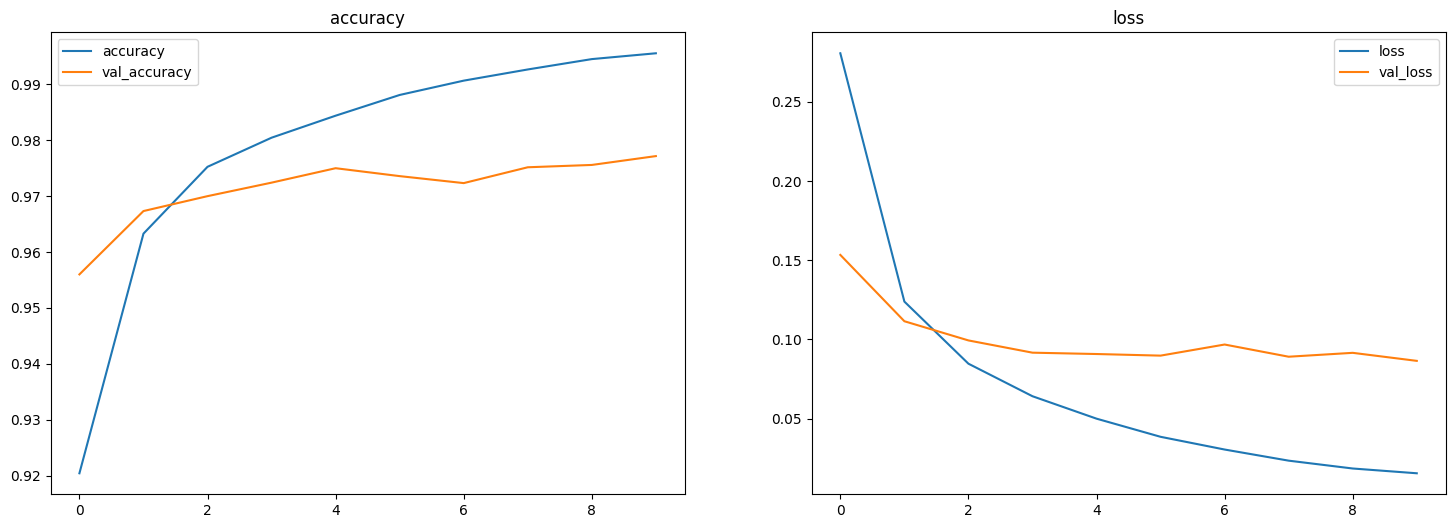

In [ ]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

# 6. 모델 저장 및 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/Colab Notebooks/my_model.h5")
#loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/my_model.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 7.예측해보기

In [ ]:
import numpy as np

pred_proba = model.predict(X_test[:1])

# 가장 높은 확률의 클래스 선택
pred = np.argmax(pred_proba, axis=1)[0]

# 결과 출력
print("real:", np.argmax(y_test[0]))  # 실제 정답
print("predict:", pred)  # 예측 결과

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
real: 7
predict: 7


In [ ]:
from google.colab import files
files.upload()

In [ ]:
from PIL import Image
import numpy as np
from keras.models import load_model

# 모델 경로 (Google Drive에서 불러오기)
model_path = "/content/drive/MyDrive/Colab Notebooks/my_model.h5"
model = load_model(model_path)

# 업로드한 이미지 경로
image = Image.open("/content/random.png")
image = image.convert('L')  # 흑백 변환
image = image.resize((28, 28))  # MNIST 크기와 맞춤

# 이미지 전처리
data = np.array(image.getdata())
data = data.reshape(1, 28 * 28)
data = data.astype('float32') / 255.0
data = 1 - data  # 색 반전 (검정색 글자일 때만 필요)

# 예측
prediction = model.predict(data)
predicted_class = np.argmax(prediction, axis=1)[0]

print("예측 결과:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
예측 결과: 6


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


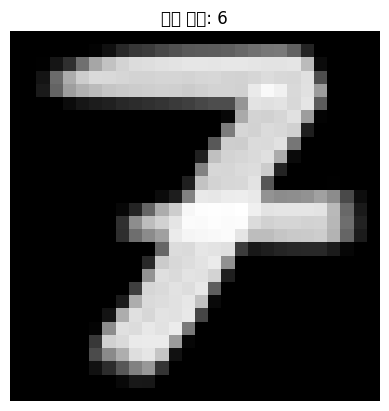

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.title(f"예측 결과: {predicted_class}")
plt.axis('off')
plt.show()
